# Python workshop - 2025

**Last update**: 2025-05-19  
**Author**: El-Amine Mimouni  
**Affiliation**: Québec Centre for Biodiversity Science

**Overview**: In this notebook, we will see how to use PyProj.

---

# PyProj

Information about PyProj can be found at [https://pyproj4.github.io/pyproj/stable/index.html](https://pyproj4.github.io/pyproj/stable/index.html).

Information about the actual Proj can be found at [https://proj.org/en/stable/index.html](https://proj.org/en/stable/index.html).

In [1]:
# The star of today
import pyproj

# Other actors
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

# 2. Projections and CRS

A projection is a way of representing FEATURES, which are on a 3D surface of the Earth, on a flat 2D map. A Coordinate Reference System (CRS) defines how spatial data relates to real-world locations, combining a projection with a coordinate system and a datum.

In [8]:
# Create instances of CRS for three CRS
# Use their EPSG codes
# Note: Check out the other .from_x() methods
wgs84 = pyproj.CRS.from_string("EPSG:4326")
nad83_ql = pyproj.CRS.from_string("EPSG:32198")
nad83_cali = pyproj.CRS.from_string("EPSG:2227")

# Print info about each CRS!
print("WGS84 info:")
print(wgs84)
print(type(wgs84))
#
print("\nNAD83 / QL info:")
print(nad83_ql)
print(type(nad83_ql))
#
print("\nNAD83 / Cali info:")
print(nad83_cali)
print(type(nad83_cali))

WGS84 info:
EPSG:4326
<class 'pyproj.crs.crs.CRS'>

NAD83 / QL info:
EPSG:32198
<class 'pyproj.crs.crs.CRS'>

NAD83 / Cali info:
EPSG:2227
<class 'pyproj.crs.crs.CRS'>


In [9]:
# More info can be obtained from the WKT representation of each CRS
print("WKT representation of WGS84:")
pprint(wgs84.to_wkt())

print("\nWKT representation of NAD83 / QL:")
pprint(nad83_ql.to_wkt())

print("\nWKT representation of NAD83 / Cali:")
pprint(nad83_cali.to_wkt())

WKT representation of WGS84:
('GEOGCRS["WGS 84",ENSEMBLE["World Geodetic System 1984 '
 'ensemble",MEMBER["World Geodetic System 1984 (Transit)"],MEMBER["World '
 'Geodetic System 1984 (G730)"],MEMBER["World Geodetic System 1984 '
 '(G873)"],MEMBER["World Geodetic System 1984 (G1150)"],MEMBER["World Geodetic '
 'System 1984 (G1674)"],MEMBER["World Geodetic System 1984 '
 '(G1762)"],MEMBER["World Geodetic System 1984 (G2139)"],MEMBER["World '
 'Geodetic System 1984 (G2296)"],ELLIPSOID["WGS '
 '84",6378137,298.257223563,LENGTHUNIT["metre",1]],ENSEMBLEACCURACY[2.0]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],CS[ellipsoidal,2],AXIS["geodetic '
 'latitude '
 '(Lat)",north,ORDER[1],ANGLEUNIT["degree",0.0174532925199433]],AXIS["geodetic '
 'longitude '
 '(Lon)",east,ORDER[2],ANGLEUNIT["degree",0.0174532925199433]],USAGE[SCOPE["Horizontal '
 'component of 3D '
 'system."],AREA["World."],BBOX[-90,-180,90,180]],ID["EPSG",4326]]')

WKT representation of NAD83 / QL:
('PROJCRS["NA

In [10]:
# A lot of information
print("Area of use for WGS84:")
print(wgs84.area_of_use)
#
print("\nArea of use for NAD83 / QL:")
print(nad83_ql.area_of_use)
#
print("\nArea of use for NAD83 / Cali:")
print(nad83_cali.area_of_use)

Area of use for WGS84:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)

Area of use for NAD83 / QL:
- name: Canada - Quebec.
- bounds: (-79.85, 44.99, -57.1, 62.62)

Area of use for NAD83 / Cali:
- name: United States (USA) - California - counties Alameda; Calaveras; Contra Costa; Madera; Marin; Mariposa; Merced; Mono; San Francisco; San Joaquin; San Mateo; Santa Clara; Santa Cruz; Stanislaus; Tuolumne.
- bounds: (-123.02, 36.73, -117.83, 38.71)


In [12]:
# Pertinent information
print("Is WGS84 projected?")
print(wgs84.is_projected)
#
print("\nIs NAD83 / QL projected?")
print(nad83_ql.is_projected)
#
print("\nIs NAD83 / Cali projected?")
print(nad83_cali.is_projected)

Is WGS84 projected?
False

Is NAD83 / QL projected?
True

Is NAD83 / Cali projected?
True


In [13]:
# Pertinent information
print("\nAxis information for WGS84:")
print(wgs84.axis_info)
#
print("\nAxis information for NAD83 / QL:")
print(nad83_ql.axis_info)
#
print("\nAxis information for NAD83 / Cali:")
print(nad83_cali.axis_info)


Axis information for WGS84:
[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree), Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

Axis information for NAD83 / QL:
[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre), Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

Axis information for NAD83 / Cali:
[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9003, unit_name=US survey foot), Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9003, unit_name=US survey foot)]


In [27]:
# Note the two values of ellipsoid for WGS84
print("\nEllipsoid information for WGS84:")
print("- Semi-major axis:", wgs84.ellipsoid.semi_major_metre)
print("- Inverse flattening:", wgs84.ellipsoid.inverse_flattening)


Ellipsoid information for WGS84:
- Semi-major axis: 6378137.0
- Inverse flattening: 298.257223563


In [ ]:
# We don't want another Mars Climate Orbiter Incident...

# Passing from one CRS to another

To switch from one CRS to another requires TRANSFORMERS

In [28]:
# Create an instance of a Transformer
my_transformer = pyproj.Transformer.from_crs(crs_from=wgs84, crs_to=nad83_ql, always_xy=True)

# Print out info about it!
print(my_transformer)
print(type(my_transformer))

proj=pipeline step proj=unitconvert xy_in=deg xy_out=rad step proj=lcc lat_0=44 lon_0=-68.5 lat_1=60 lat_2=46 x_0=0 y_0=0 ellps=GRS80
<class 'pyproj.transformer.Transformer'>


In [30]:
# Create tuples containing the coordinates of Montreal and Quebec
# Notice they are in the Lon-Lat format
montreal_wgs84 = (-73.5673, 45.5017)
quebec_wgs84 = (-71.2082, 46.8139)

print("Coordinates of Montreal in WGS84: ", montreal_wgs84)
print("Coordinates of Quebec in WGS84: ", quebec_wgs84)

Coordinates of Montreal in WGS84:  (-73.5673, 45.5017)
Coordinates of Quebec in WGS84:  (-71.2082, 46.8139)


In [40]:
# Use the .transform() method of my_transformer to get the coordinates
# Note: It needs the order Lon-Lat, which is what we had
montreal_nad83_ql = my_transformer.transform(xx=montreal_wgs84[0], yy=montreal_wgs84[1])
quebec_nad83_ql = my_transformer.transform(xx=quebec_wgs84[0], yy=quebec_wgs84[1])

#
print(f"Coordinates of Montreal in NAD83 / QL: ({montreal_nad83_ql[0]:.2f}, {montreal_nad83_ql[1]:.2f})")
print(f"Coordinates of Quebec in NAD83 / QL: ({quebec_nad83_ql[0]:.2f}, {quebec_nad83_ql[1]:.2f})")

Coordinates of Montreal in NAD83 / QL: (-396122.43, 181374.15)
Coordinates of Quebec in NAD83 / QL: (-206315.64, 317060.94)


To verify them (in case you doubt your own self):

https://epsg.io/map#srs=32198&x=-396122.43209208664&y=181374.14914630336&z=9&layer=streets
https://epsg.io/map#srs=32198&x=-206315.6389128428&y=317060.9367326632&z=8&layer=streets

# Calculating geodetic distances

Pyproj allows for the calculation of geodetic distances

In [45]:
# Initialize a Geod for WGS84:
geod_wgs84 = pyproj.Geod(ellps="WGS84")

# Identical to:
geod_wgs84 = pyproj.Geod(a=wgs84.ellipsoid.semi_major_metre, f = 1.0 / wgs84.ellipsoid.inverse_flattening)

# Print info about it!
print(geod_wgs84)
print(type(geod_wgs84))

Geod(ellps='WGS84')
<class 'pyproj.geod.Geod'>


In [46]:
# Coordinates of two points: Montreal and Paris
# We already defined Montreal, so let's just add Paris in Lon-Lat form
paris_wgs84 = (2.3522, 48.8566)

In [47]:
# Compute the inverse (distance, azimuths) using the WGS84 ellipsoidal model
# Note: Slightly more informative ARGUMENTS (and plural at that!)
azimuth1_wgs84, azimuth2_wgs84, distance_wgs84 = geod_wgs84.inv(lons1=montreal_wgs84[0],
                                                                lats1=montreal_wgs84[1],
                                                                lons2=paris_wgs84[0],
                                                                lats2=paris_wgs84[1])

# BTW, in geodesy:
# 
# - Forward problem: You are given the coordinates of a starting point, a distance and an azimuth.
#                    Based on these, and you want to compute the destination point coordinates.
#
# - Inverse problem: You are given the coordinates of two points.
#                    Based on these, you want to compute the distance and the azimuth between them.

In [48]:
# WGS84 distance (in km)
print(f"Distance (WGS84): {distance_wgs84 / 1000:.2f} km")

Distance (WGS84): 5521.12 km


In [57]:
# Spherical model just for fun
# Same planet, but a perfect sphere
#geod_sphere = pyproj.Geod(a=6371000.00, f = 0.0)
#geod_sphere = pyproj.Geod(ellps="sphere")

# Consider
geod_sphere = pyproj.Geod(a=(wgs84.ellipsoid.semi_major_metre + wgs84.ellipsoid.semi_minor_metre) / 2.0, f=0.0)

# Compute the inverse (distance, azimuths) using the WGS84 ellipsoidal model
azimuth1_sphere, azimuth2_sphere, distance_sphere = geod_sphere.inv(lons1=montreal_wgs84[0],
                                                                    lats1=montreal_wgs84[1],
                                                                    lons2=paris_wgs84[0],
                                                                    lats2=paris_wgs84[1])

# Spherical distance in km:
print(f"Distance (Spherical): {distance_sphere / 1000:.2f} km")

Distance (Spherical): 5502.07 km


In [58]:
# How different are the two distances?
print(f"Difference between the two distances: {(distance_wgs84 - distance_sphere) / 1000:.2f} km")

Difference between the two distances: 19.05 km


# Biological application


In [59]:
# Calculating
# Load the journey of KOR0104
df_104 = pd.read_csv(filepath_or_buffer="../data/KOR0104-43589.csv")
df_104.head()

,event-id,visible,timestamp,location-long,location-lat,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,29823005834,True,2018-10-04 12:00:00.000,127.80097,34.598628,radio-transmitter,Chelonia mydas,43589,KOR0104,Marine bioresource conservation and restoratio...
1,29823005835,True,2018-10-07 23:41:00.000,127.40653,34.415340,radio-transmitter,Chelonia mydas,43589,KOR0104,Marine bioresource conservation and restoratio...
2,29823005836,True,2018-10-08 06:51:00.000,127.32227,34.309520,radio-transmitter,Chelonia mydas,43589,KOR0104,Marine bioresource conservation and restoratio...
3,29823005837,True,2018-10-11 06:15:00.000,126.95259,34.171100,radio-transmitter,Chelonia mydas,43589,KOR0104,Marine bioresource conservation and restoratio...
4,29823005838,True,2018-10-12 22:06:00.000,126.60508,34.095530,radio-transmitter,Chelonia mydas,43589,KOR0104,Marine bioresource conservation and restoratio...


In [60]:
# Compute the inverse (distance, azimuths) using the WGS84 ellipsoidal model
# By removing the last and first values (.iloc() is of choice here), we can
# match each successive stop by the turtle
azimuth1s_wgs84, azimuths2_wgs84, distances_kor104 = geod_wgs84.inv(lons1=df_104.iloc[:-1]["location-long"],
                                                                    lats1=df_104.iloc[:-1]["location-lat"],
                                                                    lons2=df_104.iloc[1:]["location-long"],
                                                                    lats2=df_104.iloc[1:]["location-lat"])

In [64]:
# Print the distances!
print("Array of distances:")
print(distances_kor104)

Array of distances:
[ 41538.67112944  14066.70994608  37357.61285519  33132.32149367
  46316.26519064  22593.02356907  26413.29882993  65764.67972911
  50864.22917364  64266.4072772   61882.251694    53305.46122828
  43526.8272042   41597.50673238  25256.07271825  36286.91876996
  36453.86646745  44234.78944285  57877.78916697  32564.20427765
  31370.46706306  27417.34582176  47821.61035017  22754.38178625
  22653.18719468  51857.7303886   47969.79167369  57303.91959476
  63257.13391324  20772.46418122  28092.55197833  70329.25972077
  26964.72128164  46227.75747193  36650.84415983   1399.61671394
  53413.77699217  31973.66957049  40319.29398697  46465.20112082
  46357.86079467  53040.63554385  53414.22342607  40571.82516774
  30357.88877002  96015.2800248   74986.11732721  58236.32897227
  58360.21561491  46802.59797895  48629.74582793  23690.96853913
  13448.79379847   6449.40526502   1221.85144863  22235.33685271
 103122.40111871  35341.0808887   73771.42688469  37532.05245775
  579

In [65]:
# BTW try and guess what type distances_kor104 is?
print(type(distances_kor104))

<class 'numpy.ndarray'>


In [70]:
# Print mini-message
print(f"Total distance traveled by KOR-104: {distances_kor104.sum() / 1000:.2f} km")

Total distance traveled by KOR-104: 5203.51 km


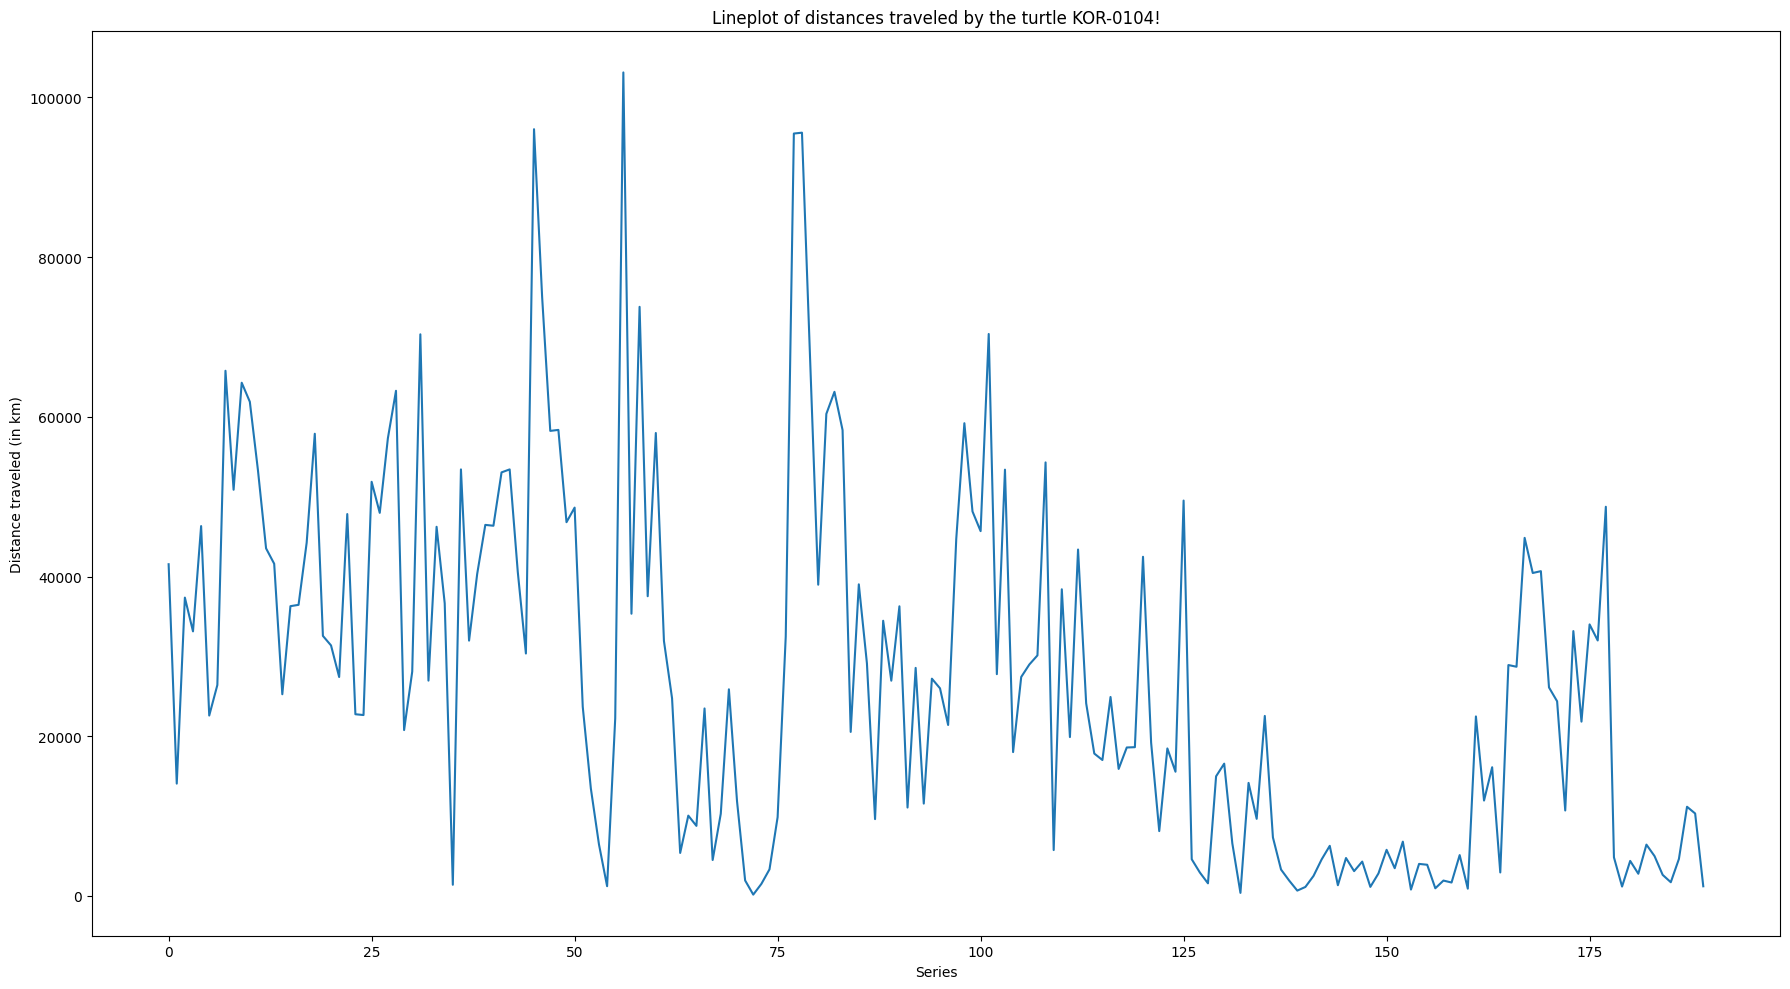

In [71]:
# Create a figure and axis
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 10))
ax.set_aspect(aspect="auto", adjustable="box")

# Scatter plot for original data points (assuming distances_wgs84 is defined)
ax.plot(distances_kor104)

# Add axis labels and title
ax.set_title(label="Lineplot of distances traveled by the turtle KOR-0104!")
ax.set_xlabel(xlabel="Series")
ax.set_ylabel(ylabel="Distance traveled (in km)")

# Adjust layout and show the plot
fig.tight_layout()
plt.show()

# BONUS ROUND

In [72]:
# Have a look at the "timestamp" column
print(df_104["timestamp"].head())
print(df_104["timestamp"].dtype)

0    2018-10-04 12:00:00.000
1    2018-10-07 23:41:00.000
2    2018-10-08 06:51:00.000
3    2018-10-11 06:15:00.000
4    2018-10-12 22:06:00.000
Name: timestamp, dtype: object
object


In [73]:
# Use Pandas particular datetime format
print(pd.to_datetime(df_104["timestamp"]).head())
print(pd.to_datetime(df_104["timestamp"]).dtype)

0   2018-10-04 12:00:00
1   2018-10-07 23:41:00
2   2018-10-08 06:51:00
3   2018-10-11 06:15:00
4   2018-10-12 22:06:00
Name: timestamp, dtype: datetime64[ns]
datetime64[ns]


In [74]:
# Use it to replace the "timestamp" variable
# No need for an additional column
df_104["timestamp"] = pd.to_datetime(df_104["timestamp"])

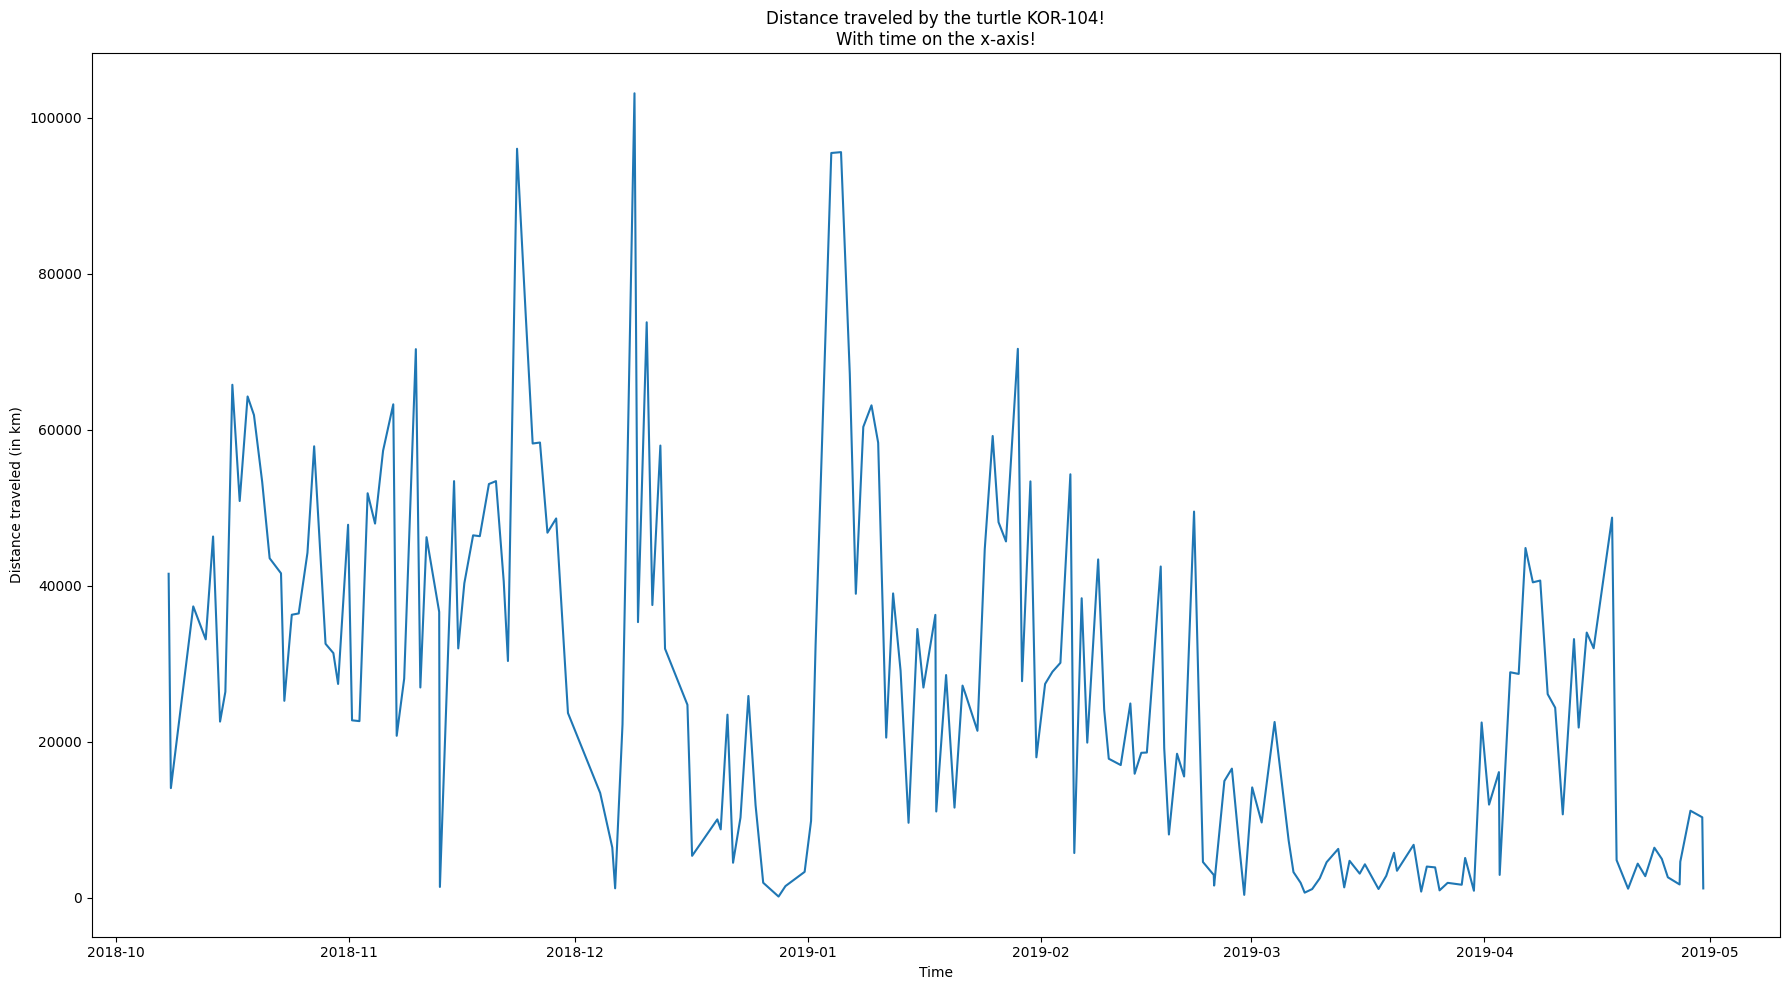

In [76]:
# Create a figure and axis
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 10))
ax.set_aspect(aspect="auto", adjustable="box")

# Scatter plot for original data points
ax.plot(df_104["timestamp"][1:], distances_kor104)

# Add axis labels and title
ax.set_title(label="Distance traveled by the turtle KOR-104!\nWith time on the x-axis!")
ax.set_xlabel(xlabel="Time")
ax.set_ylabel(ylabel="Distance traveled (in km)")

# Adjust layout and show the plot
fig.tight_layout()
plt.show()